# clustering
https://stackabuse.com/k-means-clustering-with-scikit-learn/ 

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

# general package imports
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy.optimize import curve_fit
from scipy.stats import linregress
# from spectrum import gaussian
import pandas as pd

# import tool repo
import sys

# UPDATE PATH TO PATH WHERE YOU HAVE REPO SAVED
sys.path.append('/Users/kalie/courses/ne204/lab/kalieknecht_lab2')
from tools import find_activity, import_data, subtract_baseline, normalize_minmax
from filters import fit_tau, fit_taus, JordanovFilter, BogovacFilter, CooperFilter
from spectrum import spectrum, find_compton_edge
from pulse_shape import find_rise_time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
print('cs far')
f_name = '../data/cs.h5'
f_data = h5py.File(f_name,'r')
cs = f_data['raw_data'][()]
cs_events = f_data['event_data'][()]
print(str(cs.shape[0])+' events')

cs far
152057 events


In [4]:
# convert waveform time scale to nanoseconds
wave_times = np.linspace(0,1/(250*10**6)*50000*10**9,50000)
# wave_times_cropped = np.linspace(0,1/(250*10**6)*20000*10**9,20000)

In [56]:
# crop to beginning of waveform
cs_cropped = cs[:,0:2000]

In [57]:
cs_downsample = cs_cropped[::100]
cs_downsample.shape

(1521, 2000)

In [58]:
cs_downsample

array([[8037, 8039, 8040, ..., 8198, 8203, 8201],
       [8042, 8038, 8042, ..., 8143, 8142, 8139],
       [8040, 8032, 8039, ..., 8161, 8165, 8162],
       ...,
       [8044, 8039, 8038, ..., 8146, 8140, 8141],
       [8038, 8038, 8040, ..., 8197, 8197, 8193],
       [8036, 8038, 8045, ..., 8199, 8201, 8197]], dtype=uint16)

In [59]:
cs_clean = subtract_baseline(cs_downsample)

In [60]:
cs_clean = np.zeros(cs_downsample.shape)
for i in range(len(cs_downsample)):
    cs_clean[i] = normalize_minmax(cs_downsample[i])

<IPython.core.display.Javascript object>


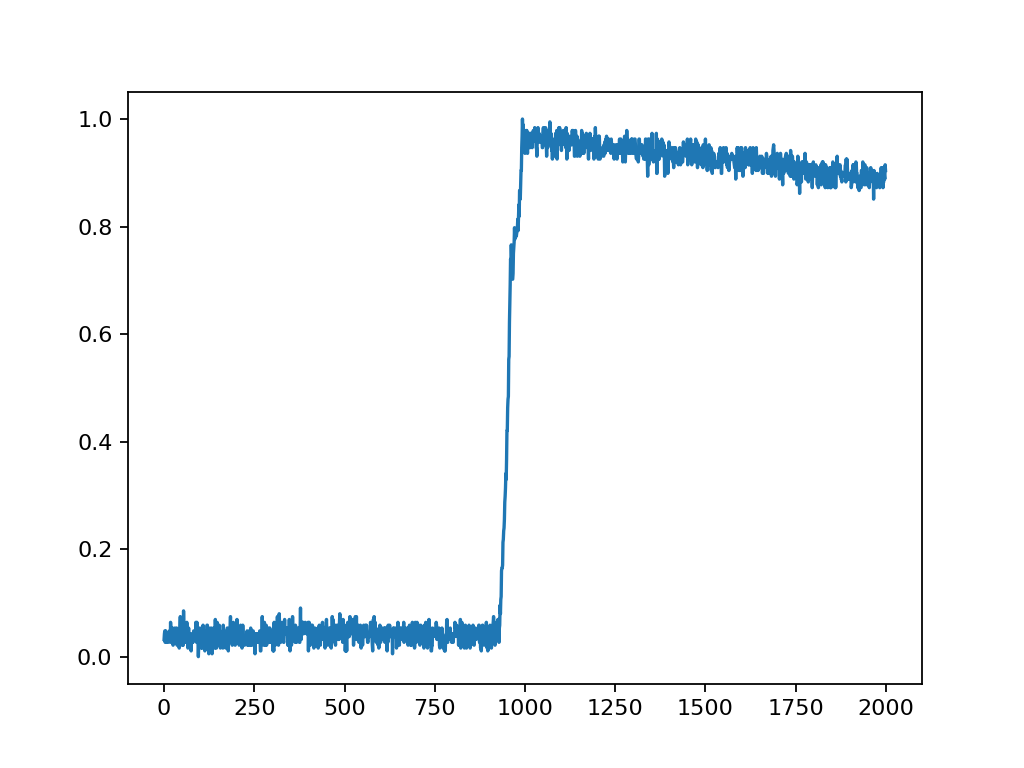

In [61]:
plt.figure()
plt.plot(cs_clean[0])
plt.show()

In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(n_clusters=2,random_state=42)

In [64]:
kmeans.fit(cs_clean)

KMeans(n_clusters=2, random_state=42)

In [65]:
label0_idx = np.argwhere(kmeans.labels_ == 0).flatten()
label1_idx = np.argwhere(kmeans.labels_ == 1).flatten()

<IPython.core.display.Javascript object>


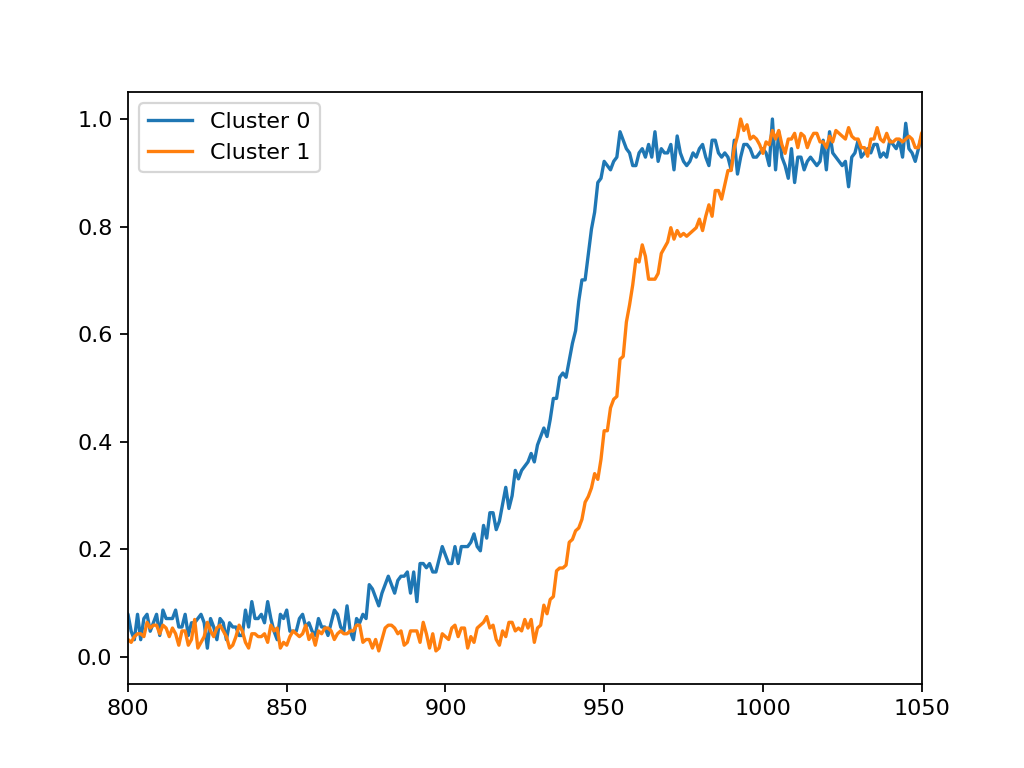

In [77]:
plt.figure()
plt.plot(cs_clean[label0_idx[0]],label='Cluster 0')
plt.plot(cs_clean[label1_idx[0]],label='Cluster 1')
plt.xlim(800,1050)
plt.legend()
plt.show()

In [78]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [79]:
kmeans.fit(cs_clean)

KMeans(n_clusters=3, random_state=42)

In [80]:
label0_idx = np.argwhere(kmeans.labels_ == 0).flatten()
label1_idx = np.argwhere(kmeans.labels_ == 1).flatten()
label2_idx = np.argwhere(kmeans.labels_ == 2).flatten()

<IPython.core.display.Javascript object>


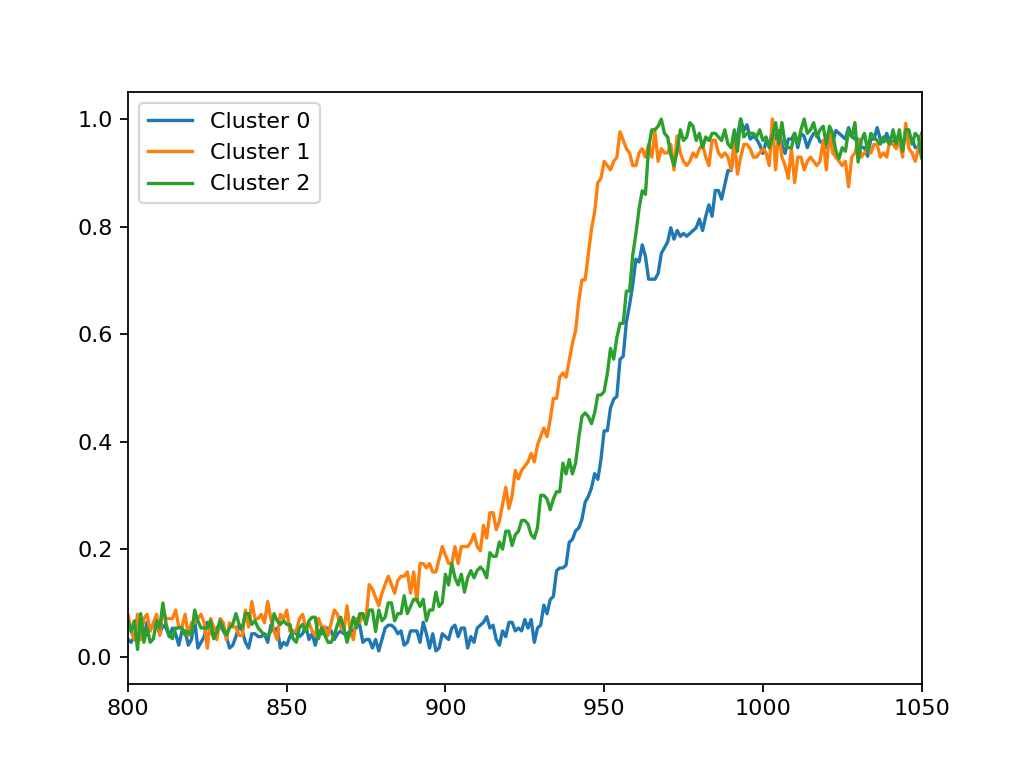

In [81]:
plt.figure()
plt.plot(cs_clean[label0_idx[0]],label='Cluster 0')
plt.plot(cs_clean[label1_idx[0]],label='Cluster 1')
plt.plot(cs_clean[label2_idx[0]],label='Cluster 2')
plt.xlim(800,1050)
plt.legend()
plt.show()

In [82]:
kmeans = KMeans(n_clusters=5,random_state=42)

In [83]:
kmeans.fit(cs_clean)

KMeans(n_clusters=5, random_state=42)

In [84]:
label0_idx = np.argwhere(kmeans.labels_ == 0).flatten()
label1_idx = np.argwhere(kmeans.labels_ == 1).flatten()
label2_idx = np.argwhere(kmeans.labels_ == 2).flatten()
label3_idx = np.argwhere(kmeans.labels_ == 3).flatten()
label4_idx = np.argwhere(kmeans.labels_ == 4).flatten()

<IPython.core.display.Javascript object>


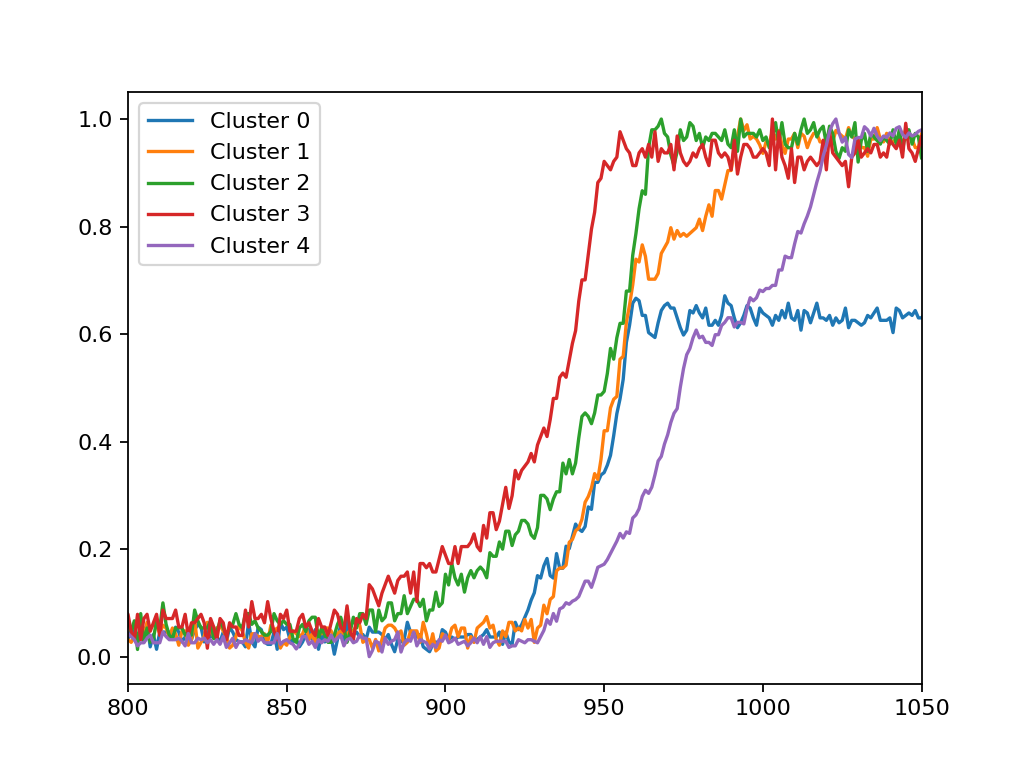

In [85]:
plt.figure()
plt.plot(cs_clean[label0_idx[0]],label='Cluster 0')
plt.plot(cs_clean[label1_idx[0]],label='Cluster 1')
plt.plot(cs_clean[label2_idx[0]],label='Cluster 2')
plt.plot(cs_clean[label3_idx[0]],label='Cluster 3')
plt.plot(cs_clean[label4_idx[0]],label='Cluster 4')
plt.xlim(800,1050)
plt.legend()
plt.show()